In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

warnings.filterwarnings('ignore',category = FutureWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)

%matplotlib inline

In [7]:
data = pd.read_excel('superstore.xlsx')

In [8]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/07/2012,31/07/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/01/2013,30/01/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


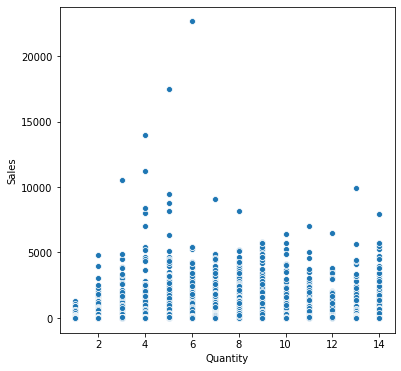

In [9]:
rcParams['figure.figsize'] = (6.0,6.0)
sns.scatterplot(x='Quantity', y='Sales', data=data)
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [11]:
dataset = data.filter(['Segment','Country','Market','Region','Category','Sales','Quantity','Discount','Profit','Shipping Cost','Order Priority'])

In [12]:
dataset.head()

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,United States,US,East,Technology,2309.650,7,0.0,762.1845,933.57,Critical
1,Corporate,Australia,APAC,Oceania,Furniture,3709.395,9,0.1,-288.7650,923.63,Critical
2,Consumer,Australia,APAC,Oceania,Technology,5175.171,9,0.1,919.9710,915.49,Medium
3,Home Office,Germany,EU,Central,Technology,2892.510,5,0.1,-96.5400,910.16,Medium
4,Consumer,Senegal,Africa,Africa,Technology,2832.960,8,0.0,311.5200,903.04,Critical


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         51290 non-null  object 
 1   Country         51290 non-null  object 
 2   Market          51290 non-null  object 
 3   Region          51290 non-null  object 
 4   Category        51290 non-null  object 
 5   Sales           51290 non-null  float64
 6   Quantity        51290 non-null  int64  
 7   Discount        51290 non-null  float64
 8   Profit          51290 non-null  float64
 9   Shipping Cost   51290 non-null  float64
 10  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.3+ MB


In [14]:
le = LabelEncoder()
cols = ('Country','Market','Region')

for c in cols:
    le.fit(list(dataset[c].values)) 
    dataset[c] = le.transform(list(dataset[c].values))
dataset.head()

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,139,6,6,Technology,2309.650,7,0.0,762.1845,933.57,Critical
1,Corporate,6,0,9,Furniture,3709.395,9,0.1,-288.7650,923.63,Critical
2,Consumer,6,0,9,Technology,5175.171,9,0.1,919.9710,915.49,Medium
3,Home Office,47,4,3,Technology,2892.510,5,0.1,-96.5400,910.16,Medium
4,Consumer,110,1,0,Technology,2832.960,8,0.0,311.5200,903.04,Critical


(0.0, 5000.0)

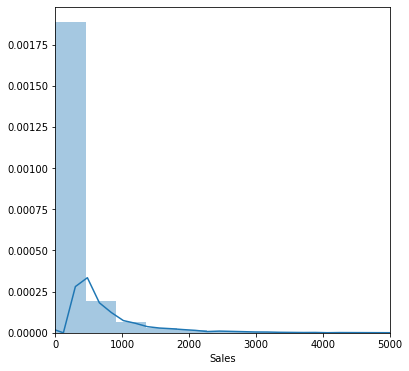

In [15]:
rcParams['figure.figsize'] = (6.0,6.00)
sns.distplot(dataset['Sales'],kde = True)
plt.xlim(0,5000)

In [16]:
datafinal = pd.get_dummies(dataset)

In [17]:
datafinal.head()

,Country,Market,Region,Sales,Quantity,Discount,Profit,Shipping Cost,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,139,6,6,2309.650,7,0.0,762.1845,933.57,1,0,0,0,0,1,1,0,0,0
1,6,0,9,3709.395,9,0.1,-288.7650,923.63,0,1,0,1,0,0,1,0,0,0
2,6,0,9,5175.171,9,0.1,919.9710,915.49,1,0,0,0,0,1,0,0,0,1
3,47,4,3,2892.510,5,0.1,-96.5400,910.16,0,0,1,0,0,1,0,0,0,1
4,110,1,0,2832.960,8,0.0,311.5200,903.04,1,0,0,0,0,1,1,0,0,0


In [18]:
datafinal.isnull().any().any()

False

In [19]:
datafinal = datafinal.fillna(datafinal.mean())

In [20]:
datafinal.head()

,Country,Market,Region,Sales,Quantity,Discount,Profit,Shipping Cost,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,139,6,6,2309.650,7,0.0,762.1845,933.57,1,0,0,0,0,1,1,0,0,0
1,6,0,9,3709.395,9,0.1,-288.7650,923.63,0,1,0,1,0,0,1,0,0,0
2,6,0,9,5175.171,9,0.1,919.9710,915.49,1,0,0,0,0,1,0,0,0,1
3,47,4,3,2892.510,5,0.1,-96.5400,910.16,0,0,1,0,0,1,0,0,0,1
4,110,1,0,2832.960,8,0.0,311.5200,903.04,1,0,0,0,0,1,1,0,0,0


In [22]:
y = datafinal['Sales']
X = datafinal.drop('Sales',axis = 1)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [45]:
cross_val_score(LinearRegression(),X_train,y_train,cv = 10).mean()

0.703485642335796

In [41]:
cross_val_score(LinearRegression(),X_train,y_train,cv = 10).std()

10706.246430433508

In [39]:
cross_val_score(Ridge(),X_train,y_train,cv = 10).mean()

0.7034861424567908

In [40]:
cross_val_score(Lasso(),X_train,y_train,cv = 10).mean()

0.7032949024053872

This is an important difference to take note of between ridge regression and lasso regression. While ridge regression punishes high coefficient values, it will not get rid of irrelevant features by enforcing their coefficients to zero. It will only try to minimize their impact. Lasso regression on the other hand will both punish high coefficient values, and get rid of irrelevant features by setting their coefficiants to zero. Thus, when training data sets with many irrelevant features, the lasso model can be useful in feature selection
